# SaaS Review Sentiment Analysis
dgphm - gino parages - gino.prgs@gmail.com - github.com/eugeniosp3

These reviews come from a trusted site which publishes user review. The purpose of this non-commercial, educational project, is to leverage this data and create a sentiment analysis using sklearn, nltk, and pandas of the mentioned review. 



In [1]:

# libraries
import numpy as np
import pandas as pd
import re

# custom data cleaning algorithm & classification 
from clean_data import clean_data


# nltk libraries for cleaning and preparing text data
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

# creates interactive histogram plots from plotly
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px


# to create the wordcloud 
from wordcloud import WordCloud, STOPWORDS 

# modify model for machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer





In [2]:
# system setups
%matplotlib inline
py.init_notebook_mode(connected=True)
color = sns.color_palette()

In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

# metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

# transformations
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

score_dict = {}


def score_me(mn, mc, pn, y_test):
    """
    mn : the model name you want to have (ie. mn='Linear Regression')
    mc : the variable name for the model (ie. mc=linear_regression)
    pn : predictor variable name (ie. pn=y_pred)
    """
    global model_name
    model_name = {}
    model_name['Accuracy Score'] = round(accuracy_score(y_test, pn), 4)
    model_name['Micro F1 Score'] = round(f1_score(y_test, pn, average='micro'), 4)
    model_name['Macro F1 Score'] = round(f1_score(y_test, pn, average='macro'), 4)
    model_name['Weighted F1 Score'] = round(f1_score(y_test, pn, average='weighted'), 4)
    model_name['Micro Precision Score'] = round(precision_score(y_test, pn, average='micro'), 4)
    model_name['Macro Precision Score'] = round(precision_score(y_test, pn, average='macro'), 4)
    model_name['Weighted Precision Score'] = round(precision_score(y_test, pn, average='weighted'), 4)
    model_name['Micro Recall Score'] = round(recall_score(y_test, pn, average='micro'), 4)
    model_name['Macro Recall Score'] = round(recall_score(y_test, pn, average='macro'), 4)
    model_name['Weighted Recall Score'] = round(recall_score(y_test, pn, average='weighted'), 4)
    score_dict[mn] = model_name
    print(classification_report(y_test, pn), '\n', '\n')

    plt.figure(figsize=(20, 8))
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pn)), annot=True, fmt='g', annot_kws={"size": 15})
    plt.title(str(mn) + ' Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Labels')
    plt.tight_layout()

    plt.show()


def Decision_Tree(X_train, y_train, X_test, y_test):
    global dctc
    dctc_start = time.time()
    dctc= DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
    dctc_predictions = dctc.predict(X_test)
    score_me('Decision Tree Classifier', dctc, dctc_predictions, y_test)

    dctc_end = time.time()
    compute_time_dctc = dctc_end - dctc_start
    model_name['Run Time(secs)'] = round(compute_time_dctc, 3)
    print('Scores:', score_dict['Decision Tree Classifier'])


def RF_Feature_Importance(X_train, y_train, X_test, y_test):
    rfc_feature_importances = pd.DataFrame(rfc.feature_importances_, index=X_train.columns,
                                           columns=['Importance']).sort_values('Importance', ascending=False)
    plt.figure(figsize=(20, 8))
    sns.barplot(x='Importance', y=rfc_feature_importances.index,
                data=rfc_feature_importances)
    plt.title('Random Forest Classifier Feature Importances', fontsize=14)
    plt.xlabel('Importance Value', fontsize=12)
    plt.show()


def Feature_Optimization_RF(X_train, y_train, X_test, y_test):
    results = pd.DataFrame(
        columns=['Number of Features', 'Accuracy Score', 'Micro F1 Score', 'Macro F1 Score', 'Weighted F1 Score',
                 'Micro Precision Score', 'Macro Precision Score',
                 'Weighted Precision Score', 'Micro Recall Score', 'Macro Recall Score', 'Weighted Recall Score'])

    for index in np.arange(len(X_train.columns)):
        sel = RFE(RandomForestClassifier(random_state=42, n_jobs=-1), n_features_to_select=index + 1)
        sel.fit(X_train, y_train)
        x_train_rfe = sel.transform(X_train)
        x_test_rfe = sel.transform(X_test)
        model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
        model.fit(x_train_rfe, y_train)
        results.loc[index] = [index + 1,
                              round(accuracy_score(y_test, model.predict(x_test_rfe)), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(f1_score(y_test, model.predict(x_test_rfe), average='weighted'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(precision_score(y_test, model.predict(x_test_rfe), average='weighted'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='micro'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='macro'), 4),
                              round(recall_score(y_test, model.predict(x_test_rfe), average='weighted'), 4)]
        return results


def Random_Forest(X_train, y_train, X_test, y_test):
    global rfc
    '''returns rf_results dataframe which must be saved '''
    rfc_start = time.time()
    rfc = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1).fit(X_train, y_train)
    rfc_predictions = rfc.predict(X_test)
    score_me('Random Forest Classifier', rfc, rfc_predictions, y_test)

    rfc_end = time.time()
    compute_time_rfc = rfc_end - rfc_start
    model_name['Run Time(secs)'] = round(compute_time_rfc, 3)
    print('Scores:', score_dict['Random Forest Classifier'])


def Gradient_Boosting_Classifier(X_train, y_train, X_test, y_test):
    global gbc
    gbc_start = time.time()


    gbc = GradientBoostingClassifier(n_estimators=20, random_state=42).fit(X_train, y_train)

    gbc_predictions = gbc.predict(X_test)
    score_me('Gradient Boosting Classifier', gbc, gbc_predictions, y_test)

    gbc_end = time.time()
    compute_time_gbc = gbc_end - gbc_start
    model_name['Run Time(secs)'] = round(compute_time_gbc, 3)
    print('Scores:', score_dict['Gradient Boosting Classifier'])

def XG_Boost_Classifier(X_train, y_train, X_test, y_test):
    global xgc
    xgc_start = time.time()


    xgc = OneVsRestClassifier(XGBClassifier()).fit(X_train, y_train)

    xgc_predictions = xgc.predict(X_test)
    score_me('XG-Boost Classifier', xgc, xgc_predictions, y_test)

    xgc_end = time.time()
    compute_time_xgc = xgc_end - xgc_start
    model_name['Run Time(secs)'] = round(compute_time_xgc, 3)
    print('Scores:', score_dict['XG-Boost Classifier'])

def KNN_Classifier(X_train, y_train, X_test, y_test):
    global knnc
    knn_start = time.time()

    knnc = KNeighborsClassifier(n_neighbors=7, n_jobs=-1).fit(X_train, y_train)
    knn_predictions = knnc.predict(X_test)
    score_me('K-Neighbors Classifier', knnc, knn_predictions, y_test)

    knn_end = time.time()
    compute_time_knn = knn_end - knn_start
    model_name['Run Time(secs)'] = round(compute_time_knn, 3)
    print('Scores:', score_dict['K-Neighbors Classifier'])


def train_models(X_train, X_test, y_train, y_test):
    global score_dict
    score_dict = {}
    Decision_Tree(X_train, y_train, X_test, y_test)

    Gradient_Boosting_Classifier(X_train, y_train, X_test, y_test)

    XG_Boost_Classifier(X_train, y_train, X_test, y_test)

    KNN_Classifier(X_train, y_train, X_test, y_test)
    Random_Forest(X_train, y_train, X_test, y_test)

    return pd.DataFrame.from_dict(score_dict)

    if RF_O == True:
        # shows a bar chart of feature importance
        RF_Feature_Importance(X_train, y_train, X_test, y_test)
        # returns a dataframe of how features affect the performance of the RF model
        results = Feature_Optimization_RF(X_train, y_train, X_test, y_test)
        return results


score_dict_test_df = {}


def score_me_test_df(mn_t, mc_t, pn_t, y_test):
    """
    mn : the model name you want to have (ie. mn='Linear Regression')
    mc : the variable name for the model (ie. mc=linear_regression)
    pn : predictor variable name (ie. pn=y_pred)
    """
    global model_name_ts
    model_name = {}
    model_name['Accuracy Score'] = round(accuracy_score(y_test, pn_t), 4)
    model_name['Micro F1 Score'] = round(f1_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro F1 Score'] = round(f1_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted F1 Score'] = round(f1_score(y_test, pn_t, average='weighted'), 4)
    model_name['Micro Precision Score'] = round(precision_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro Precision Score'] = round(precision_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted Precision Score'] = round(precision_score(y_test, pn_t, average='weighted'), 4)
    model_name['Micro Recall Score'] = round(recall_score(y_test, pn_t, average='micro'), 4)
    model_name['Macro Recall Score'] = round(recall_score(y_test, pn_t, average='macro'), 4)
    model_name['Weighted Recall Score'] = round(recall_score(y_test, pn_t, average='weighted'), 4)
    score_dict_test_df[mn_t] = model_name
    print(classification_report(y_test, pn_t), '\n', '\n')

    plt.figure(figsize=(20, 8))
    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pn_t)), annot=True, fmt='g', annot_kws={"size": 15})
    plt.title(str(mn_t) + ' Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Labels')
    plt.tight_layout()

    plt.show()


def run_test_df(the_target_column, the_test_data):

    target_column = the_target_column
    set_to_test = the_test_data
    model_names = {'Decision Tree Classifier':[dctc, dctc.predict(set_to_test)],'Random Forest Classifier':[rfc, rfc.predict(set_to_test)],
                   'Gradient Boosting Classifier':[gbc, gbc.predict(set_to_test)],'XG-Boost Classifier':[xgc, xgc.predict(set_to_test)],
                   'K-Neighbors Classifier':[knnc, knnc.predict(set_to_test)]}
    for models in model_names:
        score_me_test_df(mn_t=models, mc_t=model_names[models][0], pn_t=model_names[models][1], y_test=the_target_column)

    model_results_ts = pd.DataFrame.from_dict(score_dict_test_df)
    return model_results_ts


# example

# train_models(classifying_set, target_column_fd, False)
# print(model_results)

# target_column_fd = bd['TARGET_CLASSES'].astype('int16')
#
# test_set = pd.read_csv('test_model.csv')
# test_set.info()
# run_X_test = classifying_set
# target_for_test = target_column_fd
# fire_dept_test_results = run_test_df(target_for_test, run_X_test)

In [4]:
scrape2 = pd.read_csv('Secondscrape_2.csv')
cd = clean_data(scrape2)


Index(['app_id', 'review_date', 'review_title', 'user_role_title',
       'company_industry', 'company_size', 'score', 'app_id.1',
       'use_case_deployment_scope', 'pros', 'cons', 'roi',
       'competitors_considered', 'support_rating_usability_recommendation',
       'other_questions', 'others_used', 'app_name', 'review_feeling',
       'merged_columns'],
      dtype='object')

In [5]:
test_set = pd.read_csv('real_test.csv')
real_test = clean_data(test_set)
real_test.to_csv()

In [6]:
# Product Scores
fig = px.histogram(cd, x="score")
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=.6)
fig.update_layout(title_text='Product Score')
fig.show()

fig = px.histogram(cd, x="review_feeling")
fig.update_traces(marker_color="red",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=.6)
fig.update_layout(title_text='Product Score')
fig.show()


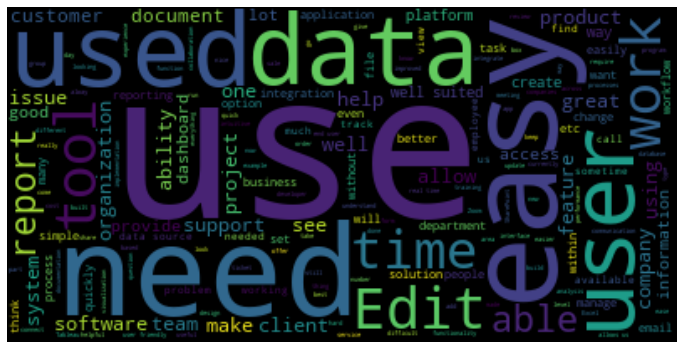

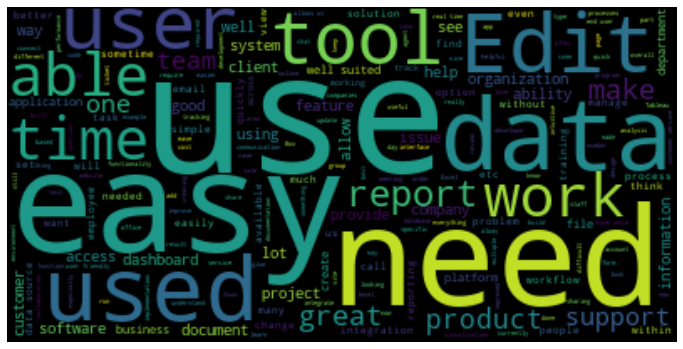

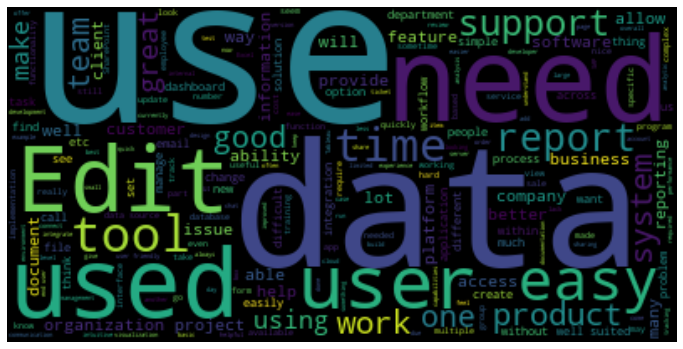

In [7]:
long_string = ' '.join(cd['merged_columns'].tolist())
positive_string = ' '.join(cd[cd['review_feeling'] == 1]['merged_columns'].tolist())
negative_string = ' '.join(cd[cd['review_feeling'] == 0]['merged_columns'].tolist())

def make_wordcloud(entry):    
    # Create stopword list:
    stopwords = set(STOPWORDS)
    stopwords.update(["br", "href"])
    textt = str(entry)
    wordcloud = WordCloud(stopwords=stopwords).generate(textt)    
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('wordcloud11.png')
    plt.show()
    
    
make_wordcloud(long_string)

make_wordcloud(positive_string)

make_wordcloud(negative_string)


In [8]:
def process_for_ml(df):
    def remove_punctuation(text):
        final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"', "'"))
        return final

    df['merged_columns'] = df['merged_columns'].apply(remove_punctuation)
    df = cd.dropna(subset=['merged_columns'])
    df['merged_columns'] = df['merged_columns'].apply(remove_punctuation)
    
    train = df['merged_columns']
    
    vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
    train = vectorizer.fit_transform(train)
    
    
    target = df['review_feeling']
    
    return train, target

              precision    recall  f1-score   support

           0       0.54      0.46      0.49      1105
           1       0.88      0.91      0.89      4760

    accuracy                           0.82      5865
   macro avg       0.71      0.68      0.69      5865
weighted avg       0.81      0.82      0.82      5865
 
 



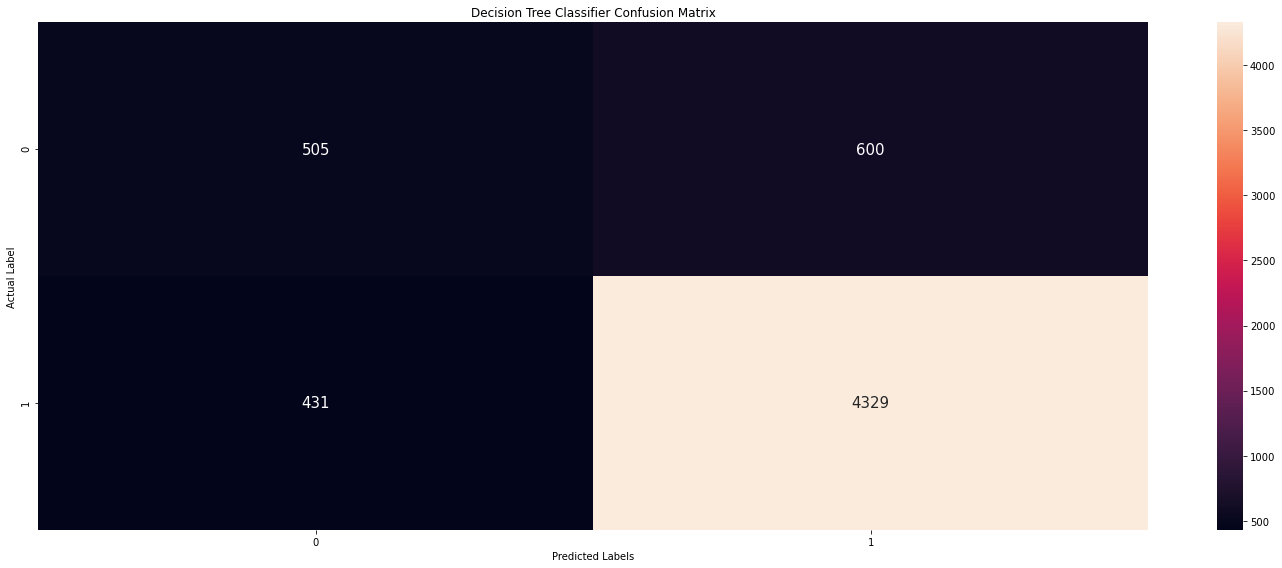

Scores: {'Accuracy Score': 0.8242, 'Micro F1 Score': 0.8242, 'Macro F1 Score': 0.6942, 'Weighted F1 Score': 0.8185, 'Micro Precision Score': 0.8242, 'Macro Precision Score': 0.7089, 'Weighted Precision Score': 0.8145, 'Micro Recall Score': 0.8242, 'Macro Recall Score': 0.6832, 'Weighted Recall Score': 0.8242, 'Run Time(secs)': 11.093}
              precision    recall  f1-score   support

           0       1.00      0.01      0.01      1105
           1       0.81      1.00      0.90      4760

    accuracy                           0.81      5865
   macro avg       0.91      0.50      0.45      5865
weighted avg       0.85      0.81      0.73      5865
 
 



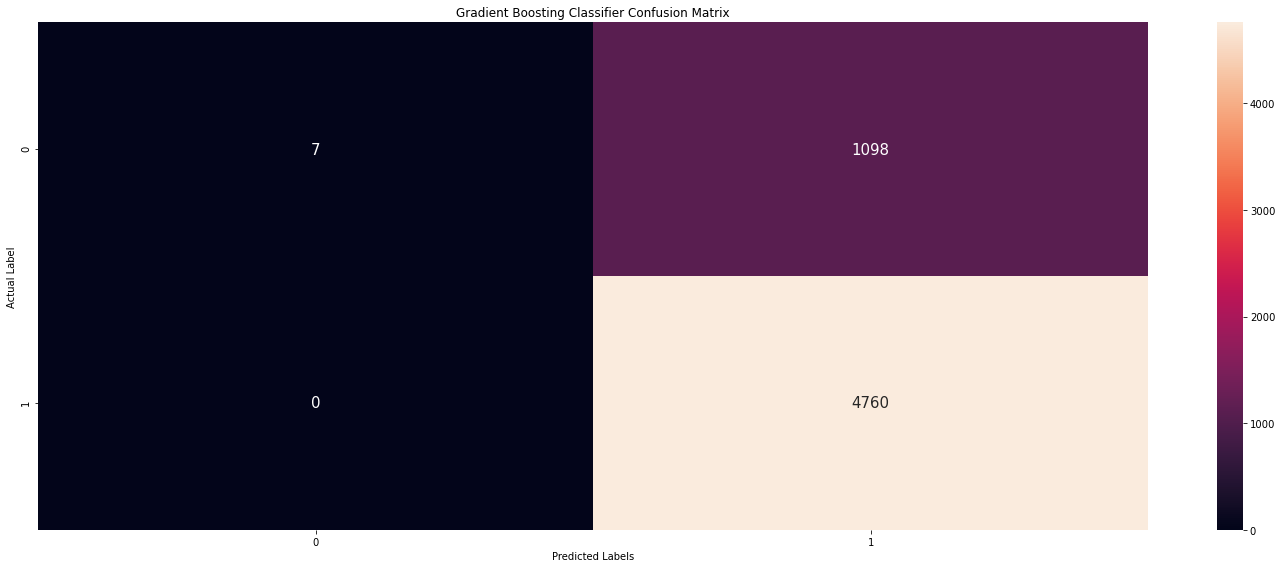

Scores: {'Accuracy Score': 0.8128, 'Micro F1 Score': 0.8128, 'Macro F1 Score': 0.4546, 'Weighted F1 Score': 0.73, 'Micro Precision Score': 0.8128, 'Macro Precision Score': 0.9063, 'Weighted Precision Score': 0.8479, 'Micro Recall Score': 0.8128, 'Macro Recall Score': 0.5032, 'Weighted Recall Score': 0.8128, 'Run Time(secs)': 20.71}
              precision    recall  f1-score   support

           0       0.82      0.30      0.44      1105
           1       0.86      0.98      0.92      4760

    accuracy                           0.86      5865
   macro avg       0.84      0.64      0.68      5865
weighted avg       0.85      0.86      0.83      5865
 
 



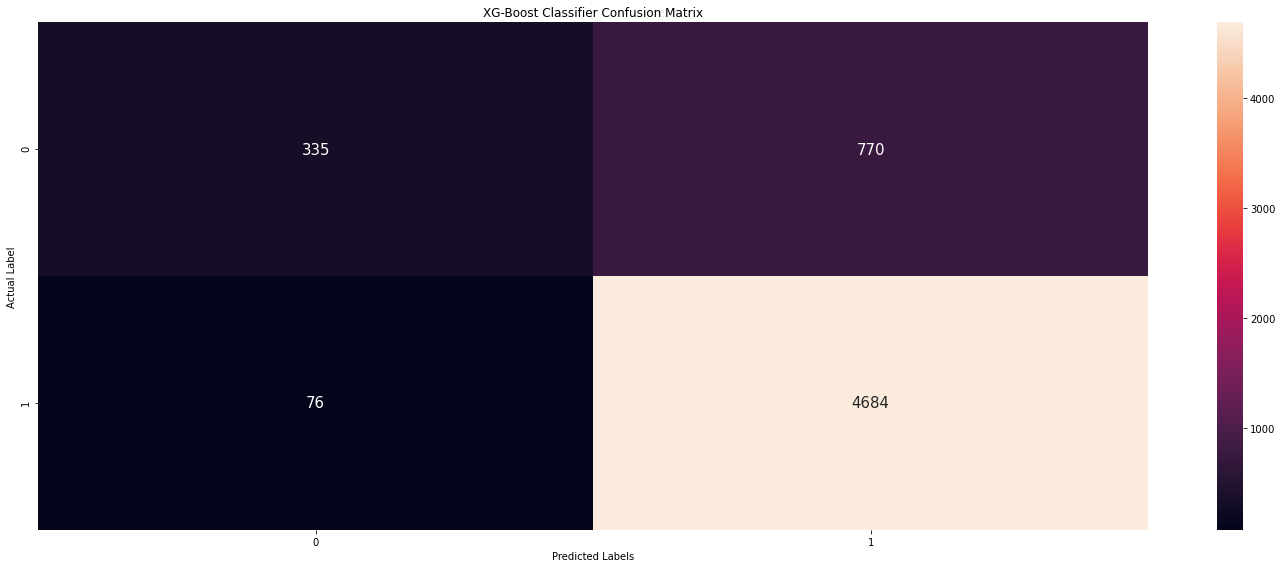

Scores: {'Accuracy Score': 0.8558, 'Micro F1 Score': 0.8558, 'Macro F1 Score': 0.6796, 'Weighted F1 Score': 0.8276, 'Micro Precision Score': 0.8558, 'Macro Precision Score': 0.837, 'Weighted Precision Score': 0.8506, 'Micro Recall Score': 0.8558, 'Macro Recall Score': 0.6436, 'Weighted Recall Score': 0.8558, 'Run Time(secs)': 5.477}
              precision    recall  f1-score   support

           0       0.36      0.11      0.16      1105
           1       0.82      0.96      0.88      4760

    accuracy                           0.80      5865
   macro avg       0.59      0.53      0.52      5865
weighted avg       0.74      0.80      0.75      5865
 
 



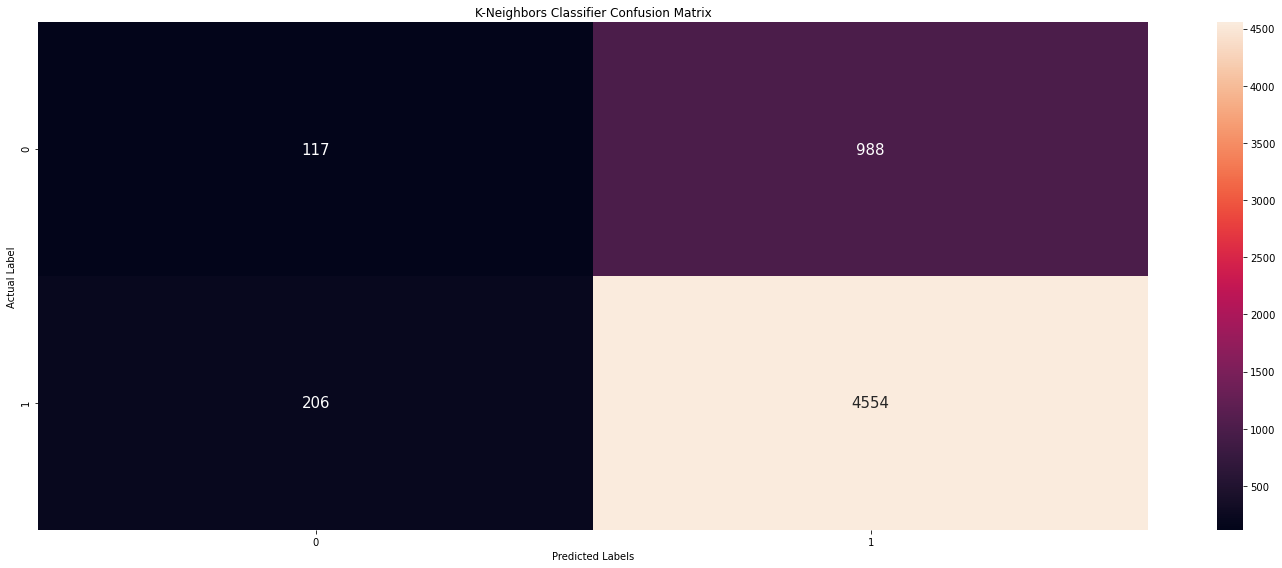

Scores: {'Accuracy Score': 0.7964, 'Micro F1 Score': 0.7964, 'Macro F1 Score': 0.524, 'Weighted F1 Score': 0.7484, 'Micro Precision Score': 0.7964, 'Macro Precision Score': 0.592, 'Weighted Precision Score': 0.7352, 'Micro Recall Score': 0.7964, 'Macro Recall Score': 0.5313, 'Weighted Recall Score': 0.7964, 'Run Time(secs)': 2.364}
              precision    recall  f1-score   support

           0       0.98      0.29      0.44      1105
           1       0.86      1.00      0.92      4760

    accuracy                           0.86      5865
   macro avg       0.92      0.64      0.68      5865
weighted avg       0.88      0.86      0.83      5865
 
 



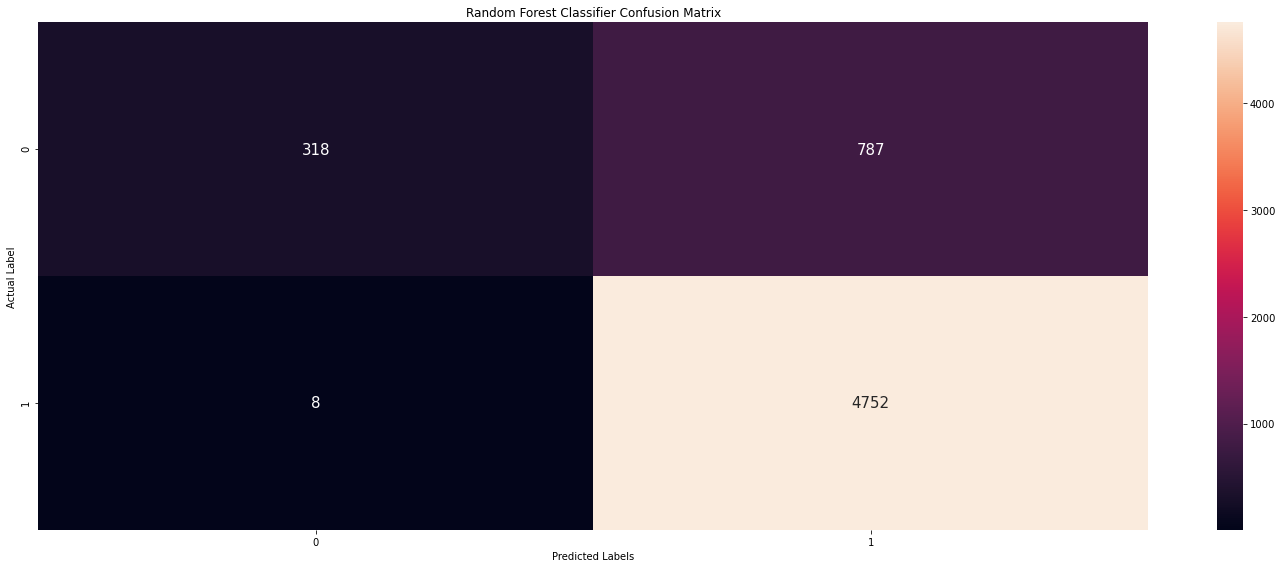

Scores: {'Accuracy Score': 0.8645, 'Micro F1 Score': 0.8645, 'Macro F1 Score': 0.6836, 'Weighted F1 Score': 0.8327, 'Micro Precision Score': 0.8645, 'Macro Precision Score': 0.9167, 'Weighted Precision Score': 0.8801, 'Micro Recall Score': 0.8645, 'Macro Recall Score': 0.6431, 'Weighted Recall Score': 0.8645, 'Run Time(secs)': 0.798}


,Decision Tree Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier,Random Forest Classifier
Accuracy Score,0.8242,0.8128,0.8558,0.7964,0.8645
Micro F1 Score,0.8242,0.8128,0.8558,0.7964,0.8645
Macro F1 Score,0.6942,0.4546,0.6796,0.5240,0.6836
Weighted F1 Score,0.8185,0.7300,0.8276,0.7484,0.8327
Micro Precision Score,0.8242,0.8128,0.8558,0.7964,0.8645
Macro Precision Score,0.7089,0.9063,0.8370,0.5920,0.9167
Weighted Precision Score,0.8145,0.8479,0.8506,0.7352,0.8801
Micro Recall Score,0.8242,0.8128,0.8558,0.7964,0.8645
Macro Recall Score,0.6832,0.5032,0.6436,0.5313,0.6431
Weighted Recall Score,0.8242,0.8128,0.8558,0.7964,0.8645


In [9]:
X, y = process_for_ml(cd)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
train_models(X_train, X_test, y_train, y_test)
prod1 = pd.DataFrame.from_dict(score_dict)    
prod1

In [10]:
def new_data_test(df):
    def remove_punctuation(text):
        final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"', "'"))
        return final

    df['merged_columns'] = df['merged_columns'].apply(remove_punctuation)
    df = cd.dropna(subset=['merged_columns'])
    df['merged_columns'] = df['merged_columns'].apply(remove_punctuation)
    
    index = df.index
    df['random_number'] = np.random.randn(len(index))
    train = df
    
    vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
    train_matrix = vectorizer.fit_transform(train['merged_columns'])
    
    train = train_matrix
    target = train['review_feeling']
    
    return train, target
    

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      3650
           1       0.96      0.97      0.97     15900

    accuracy                           0.95     19550
   macro avg       0.92      0.90      0.91     19550
weighted avg       0.95      0.95      0.95     19550
 
 



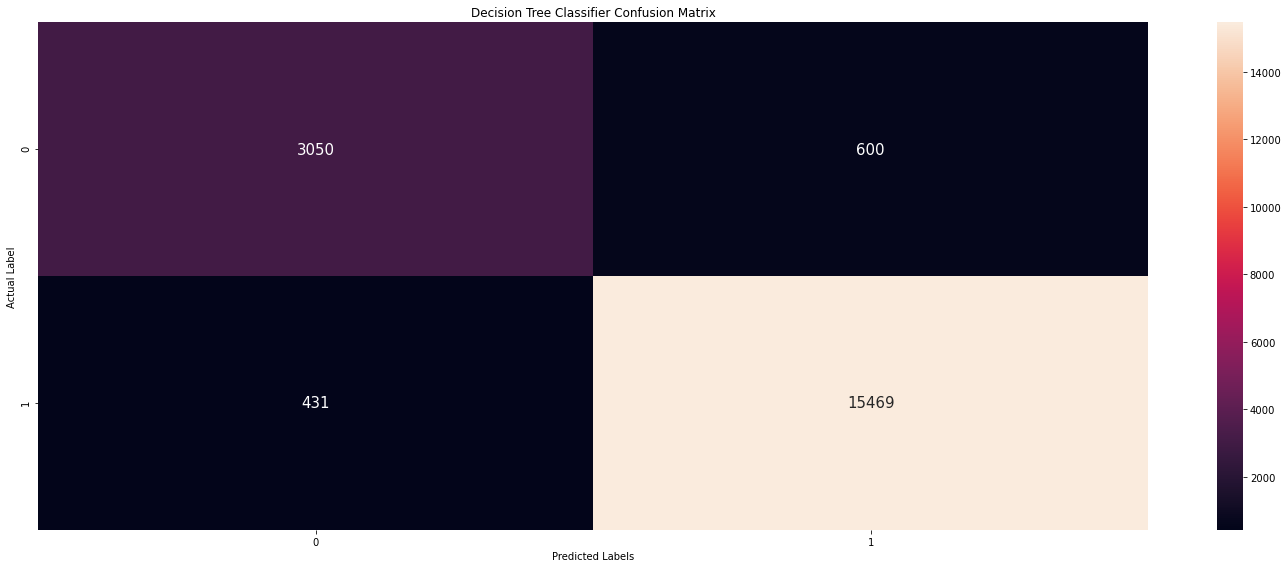

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      3650
           1       0.95      1.00      0.97     15900

    accuracy                           0.96     19550
   macro avg       0.97      0.89      0.92     19550
weighted avg       0.96      0.96      0.95     19550
 
 



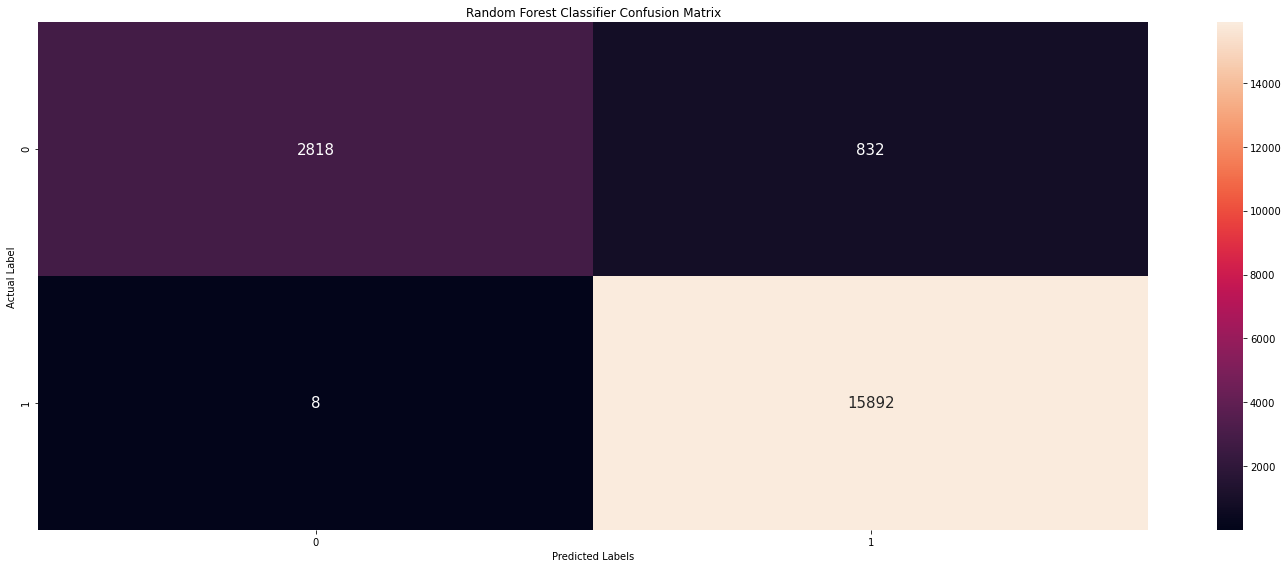

              precision    recall  f1-score   support

           0       0.88      0.01      0.02      3650
           1       0.81      1.00      0.90     15900

    accuracy                           0.81     19550
   macro avg       0.85      0.50      0.46     19550
weighted avg       0.83      0.81      0.73     19550
 
 



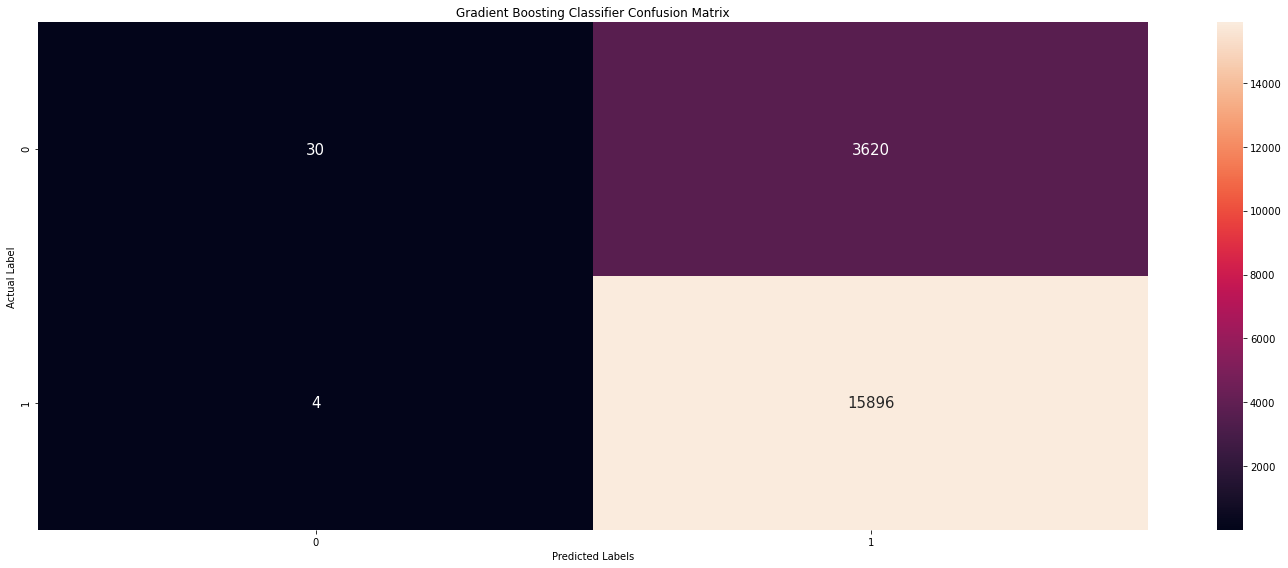

              precision    recall  f1-score   support

           0       0.97      0.63      0.76      3650
           1       0.92      0.99      0.96     15900

    accuracy                           0.93     19550
   macro avg       0.94      0.81      0.86     19550
weighted avg       0.93      0.93      0.92     19550
 
 



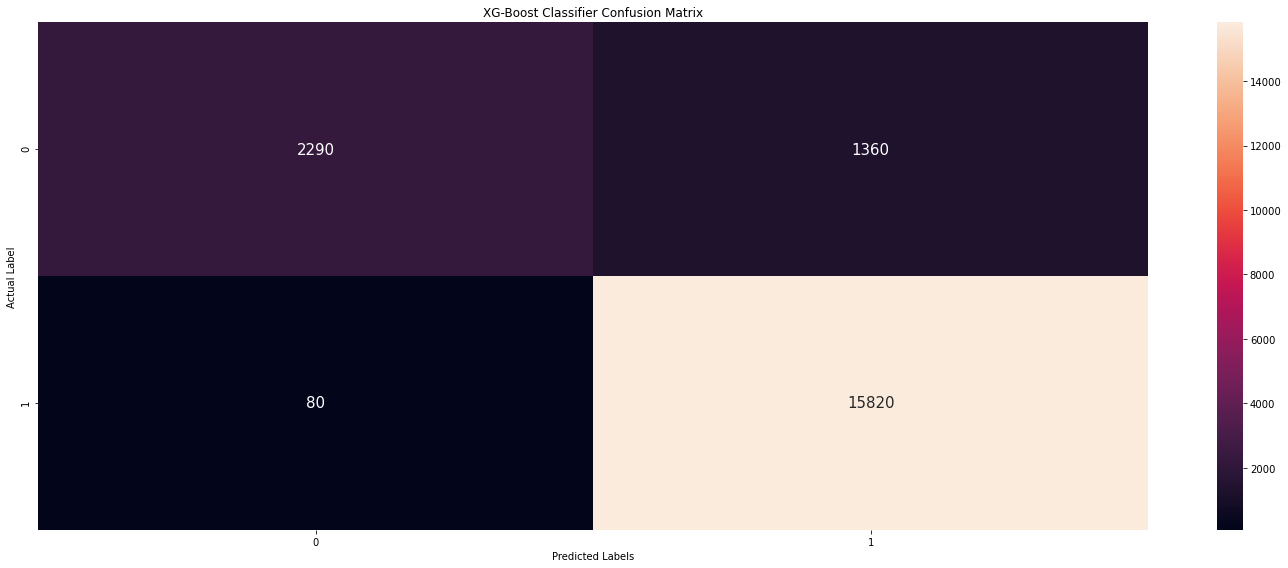

              precision    recall  f1-score   support

           0       0.59      0.19      0.29      3650
           1       0.84      0.97      0.90     15900

    accuracy                           0.82     19550
   macro avg       0.71      0.58      0.59     19550
weighted avg       0.79      0.82      0.78     19550
 
 



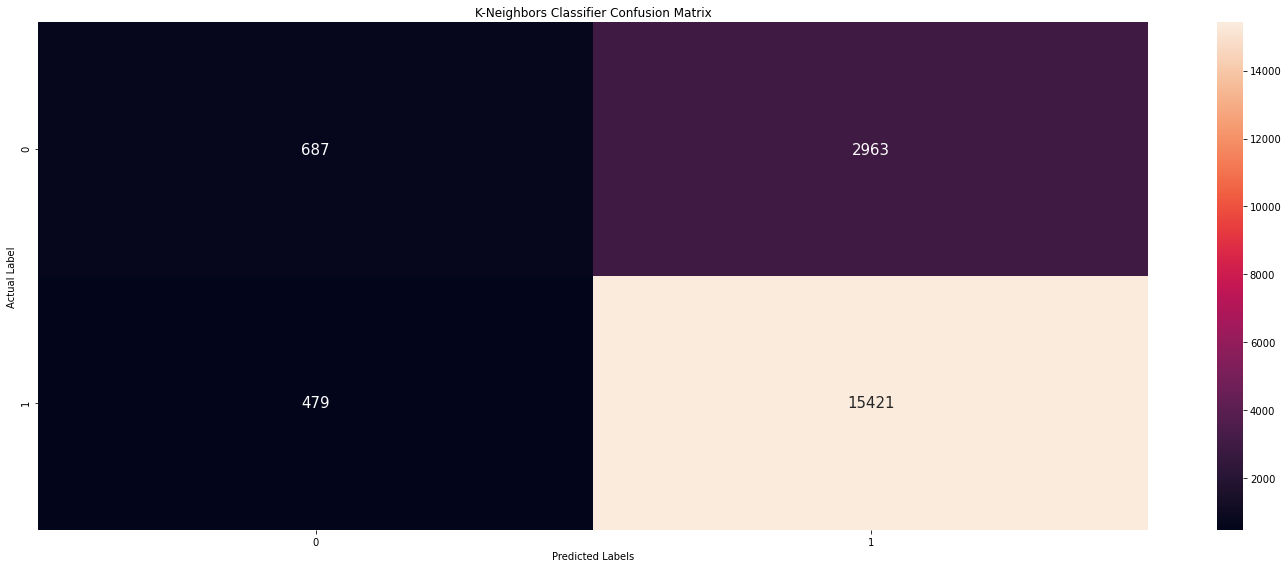

,Decision Tree Classifier,Random Forest Classifier,Gradient Boosting Classifier,XG-Boost Classifier,K-Neighbors Classifier
Accuracy Score,0.9473,0.9570,0.8146,0.9263,0.8239
Micro F1 Score,0.9473,0.9570,0.8146,0.9263,0.8239
Macro F1 Score,0.9116,0.9223,0.4570,0.8586,0.5925
Weighted F1 Score,0.9468,0.9548,0.7331,0.9199,0.7849
Micro Precision Score,0.9473,0.9570,0.8146,0.9263,0.8239
Macro Precision Score,0.9194,0.9737,0.8484,0.9435,0.7140
Weighted Precision Score,0.9465,0.9590,0.8272,0.9293,0.7922
Micro Recall Score,0.9473,0.9570,0.8146,0.9263,0.8239
Macro Recall Score,0.9043,0.8858,0.5040,0.8112,0.5790
Weighted Recall Score,0.9473,0.9570,0.8146,0.9263,0.8239


In [11]:
traintest, targettest = process_for_ml(real_test)

test_1 = run_test_df(targettest, traintest)
test_1

In [38]:
from nltk.tokenize import word_tokenize
stop_words = stopwords.words('english')
all_words = cd['merged_columns'].apply(lambda x: word_tokenize(x))
words = all_words.explode()
filtered_words = [x for x in words if x not in stop_words]
words.to_csv('wording.csv')


In [39]:
print(filtered_words[:10])

['Great', 'product', 'Would', 'recommend', 'peer', 'mine', 'looking', 'use', 'call', 'center']


In [41]:
>>> from sklearn.cluster import KMeans
# X_train, X_test, y_train, y_test 
kmeans = KMeans(n_clusters=10, random_state=42).fit(X)
cd['review_label'] = kmeans.labels_

cd.to_csv('cleaned_data.csv')
